<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5BDL%5D_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시작 전 GPU 연결하기!!

런타임 유형변경

# 웹 상의 데이터 불러오기

In [19]:
url = 'https://img.freepik.com/premium-photo/cute-puppy-of-maltipoo-dog-posing-running-isolated-over-white-studio-background-playful-animal_756748-85193.jpg'
url = 'https://cdn.newsquest.co.kr/news/photo/202305/206197_97856_1244.jpg'

- 이력으로 하나의 이미지를 제공
- 해당 이미지의 종류(클래스)를 예측
하늘0.3,, 산 1.5..등등


In [20]:
import requests
from PIL import Image
import matplotlib.pyplot as plt

# 이미지를 웹에서 불러오는 함수
def load_image_from_web(url):
    response = requests.get(url, stream=True).raw
    img = Image.open(response).convert('RGB')
    if img is None :
        raise ValueError('url로부터 데이터를 가져오지 못했습니다. 다른 url을 사용해보세요!')
    return img

# 이미지 시각화 코드
def imshow(img):
    plt.imshow(img)
    plt.axis('off')

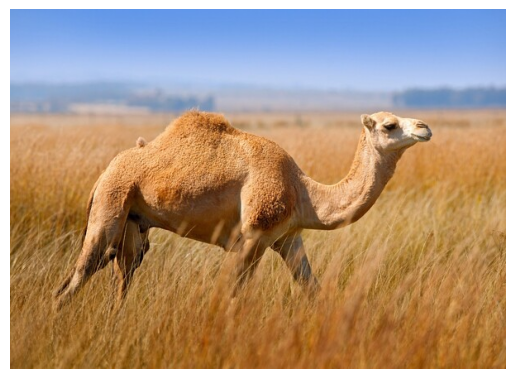

In [21]:
image = load_image_from_web(url)
imshow(image)

머신러닝 모델은 학습 과정과 똑같은 전처리를 진행한 뒤 추론을 진행
- ResNet 모델이 학습할 당시의 전처리 과정이 저장된 class 가 존재
  - 학습 결과물이 저장된 객체
- 만약 resnet 18 모델이면
- ResNet18_Weights 라는 이름의 클래스


# 타깃 이미지 분류 모델과 전처리 과정 불러오기

- 옵션 : resnet18, resnet34, resnet50, resnet101, resnet152

In [27]:
import re
import torchvision.models as models

# 모델 선택 및 로드
def get_model_and_trans(model_name):
    if model_name not in ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']:
        raise ValueError("model name을 확인해주세요.  옵션 : 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152'")

  #ResNet18_Weights 라는 클래스안에 transforms 가져와 전처리!!
    weight_name = 'ResNet' + re.findall(r'\d+', model_name)[0] +'_Weights'
    weights = getattr(models, weight_name).DEFAULT

    transforms = weights.transforms()

    # 모델가져오기
    model = getattr(models, model_name)(weights=weights)
    model.eval()

    # 학습이 되었을때 추가적인 정보들 (1번째 클래스,.. 2번째 정보들가져와)
    meta_data = weights.meta
    return model, transforms, meta_data

In [28]:
# 타깃 모델을 선택하고
model_name='resnet18'

In [29]:
# 모델과 그에 맞는 전처리 과정을 불러온다
myModel, transform, meta_data = get_model_and_trans(model_name)

In [30]:
myModel

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [32]:
transform
#이미지 자르기
#이미지 크기 변경
# 평균
#표준편차


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

# 모델이 입력하기 전의 전처리 진행

In [34]:
import torch

# 이미지 전처리 진행  trnasform 이미지 적용
trans_image = transform(image)
trans_image = torch.unsqueeze(trans_image, 0)

In [35]:
def imshow_from_tensor(tensor):
    image = tensor.cpu().clone()  # 텐서 복제
    image = image.squeeze(0)      # 배치 차원 제거
    image = image.permute(1, 2, 0)  # 차원 재배열
    image = image.numpy()

    plt.imshow(image)
    plt.axis('off')
    plt.show()

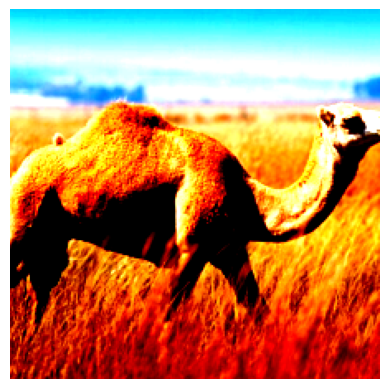

In [36]:
# 전처리가 진행되면 원본 이미지의 형태가 많이 훼손됨
# 하지만 딥러닝 모델은 이런 형태를 더욱 잘 알아본다고!
imshow_from_tensor(trans_image)

# 모델에 이미지를 넣어주고 결과를 분석

In [37]:
# 모델에 입력하고 결과를 출력
output = myModel(trans_image)

In [38]:
# 1000개의 결과값을 출력
# 이들 중 최고 값을 갖는 값이 출력의 결과값!
print(output)

tensor([[-2.1022e+00, -1.7909e+00, -2.8614e+00, -3.1083e+00,  4.3723e-02,
          8.0224e-01, -1.2811e+00,  1.4239e+00,  4.1312e+00,  1.0367e+01,
          6.6905e-01, -2.9448e+00, -1.1190e+00, -3.6539e+00, -5.4744e+00,
          3.2516e-02, -6.3722e-01, -5.2525e-01, -1.3841e+00, -2.8619e+00,
         -3.6738e-01,  5.0989e+00, -5.8371e-01,  6.4267e+00, -2.2818e+00,
          7.2219e-01,  1.0841e+00, -2.4407e-01, -2.1532e+00,  6.1973e-01,
          6.6379e-01,  6.3102e-01,  1.8955e+00,  2.6771e+00,  2.9632e+00,
          8.8163e-02,  5.3096e-01, -1.9411e+00,  3.2184e+00,  7.3686e-01,
          1.4110e+00,  1.2881e+00,  3.0752e+00,  2.2459e+00, -2.2075e-01,
          1.9441e+00, -8.6241e-01,  1.7956e+00,  4.8741e+00, -9.4506e-01,
         -2.4307e+00,  1.6158e+00, -5.3930e-01, -8.4481e-01,  2.1292e+00,
         -2.7343e+00, -2.1951e+00, -3.7465e+00, -2.3941e-01, -5.0740e-01,
          1.8324e+00,  2.6166e+00,  1.1687e-02,  2.6516e+00, -1.1785e-01,
         -3.7878e-01,  3.6289e+00,  2.

In [39]:
import torch.nn.functional as F

# 출력 결과로부터 출력 결과 도출하기
conf, predicted = F.softmax(output, dim=1).max(1)
total_class = meta_data["categories"]
cls = total_class[predicted.item()]

print(f'최종 결과 입력 이미지는 {conf.item()*100:.2f} % 의 확률로 {cls} 이라고 예측됩니다.')

최종 결과 입력 이미지는 99.99 % 의 확률로 Arabian camel 이라고 예측됩니다.
